In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기 

In [2]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

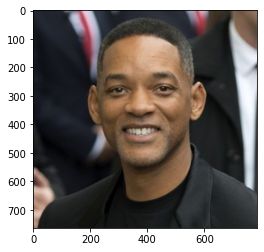

In [4]:
image = '/content/drive/MyDrive/aiffelcsv/윌스미스.png'
img_bgr = cv2.imread(image) # openCV로 이미지를 불러온다
img_show = img_bgr.copy() # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용합니다. 원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력된 것입니다. 그래서, opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 위와 같은 색깔 보정처리를 해주게 됩니다.

# 얼굴 검출 & 랜드마크 검출하기

In [5]:
detector_hog = dlib.get_frontal_face_detector() # dlib을 활용해 hog detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 2) #(image , num of image pyramid)

rectangles[[(213, 176) (545, 509)]]


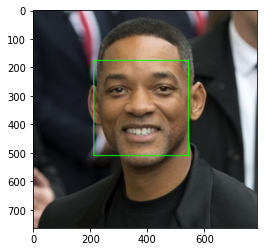

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
#  저장한 랜드마크 불러오기
model_path = '/content/drive/MyDrive/aiffelcsv/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
# 얼굴 영역 박스마다 face landmark를 찾아냅니다.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해줍니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_points 는 68개로 이루전 리스트가 된다
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
# list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장

68


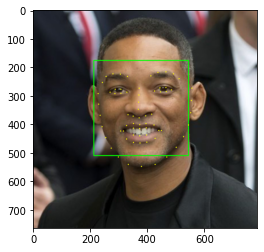

In [8]:
#랜드마크 영상출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))


(369, 347)
(x,y) : (369,180)
(w,h) : (333,333)


(333, 333, 3)


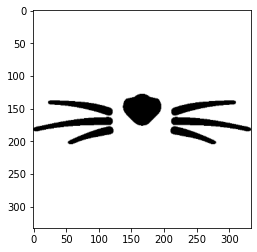

In [10]:
sticker_path = '/content/drive/MyDrive/aiffelcsv/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

# 스티커 적용 위치 확인하기

In [11]:
# 원본이미지에 스티커 이미지를 추가하기위해 x,y좌표 조정
refined_x = x - w // 2
refined_y = y
print ('x,y): (%d,%d)'%(refined_x, refined_y))


x,y): (203,180)


In [12]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(333, 333, 3)
(x,y) : (203,180)


cv2.addWeighted(src1, alpha, src2, beta ,gamma, dst=None,dytpe=None) 

- src1:(입력) 첫번재 영상
- alpha : 첫 번재 영상 가중치
- src2: 두 번째 영상. src1과 같은크기 & 같은 타입
- beta : 두번째 영상 가중치
- gamma : 결과영상에 추가적으로 더할값
- dst : 가중치 합 결과 영상
- dtype : 출력 영상 의타입

#스티커 적용하기

In [13]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


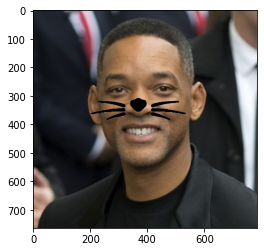

In [14]:
plt.imshow(img_rgb)
plt.show()

# 여러명 있을때는 같이 적용이 될까?!

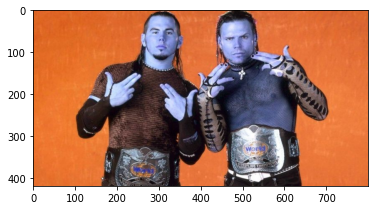

In [15]:
image_path = '/content/drive/MyDrive/aiffelcsv/wwe.jpg'
img_bgr = cv2.imread(image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()  

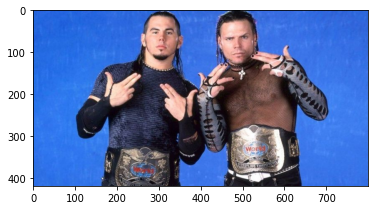

In [16]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [17]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(271, 31) (349, 109)], [(452, 48) (529, 126)]]


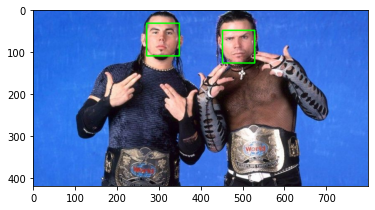

In [19]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [20]:
n_faces = len(dlib_rects)
n_faces

2

In [21]:
model_path = '/content/drive/MyDrive/aiffelcsv/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(269, 55), (270, 64), (271, 74), (272, 83), (273, 92), (278, 100), (285, 106), (294, 111), (305, 112), (316, 112), (326, 109), (333, 104), (339, 97), (342, 88), (344, 79), (346, 69), (347, 59), (278, 49), (283, 44), (290, 43), (296, 44), (303, 47), (314, 46), (321, 44), (327, 43), (333, 45), (338, 49), (308, 52), (308, 56), (308, 60), (307, 65), (301, 73), (304, 74), (307, 74), (310, 74), (313, 74), (287, 55), (290, 53), (295, 52), (299, 55), (295, 56), (290, 56), (318, 56), (321, 53), (326, 54), (330, 56), (326, 57), (322, 57), (294, 89), (299, 84), (303, 82), (306, 83), (309, 83), (314, 86), (318, 91), (313, 93), (309, 94), (306, 94), (302, 93), (298, 92), (297, 89), (303, 87), (306, 88), (309, 88), (316, 91), (309, 87), (306, 87), (303, 86)]


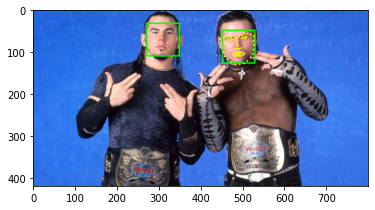

In [22]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [23]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (307,73)
(w,h) : (79,79)
(x,y) : (490,90)
(w,h) : (78,78)


(x,y) : (451,51)


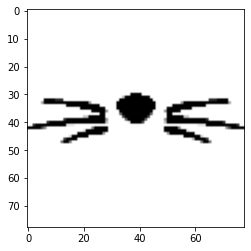

In [24]:
sticker_path = '/content/drive/MyDrive/aiffelcsv/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [25]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(78, 78, 3)
(x,y) : (451,51)


(78, 78, 3)


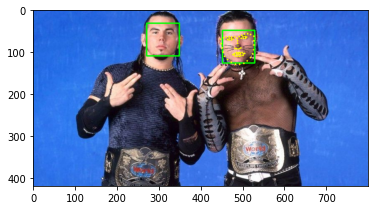

In [26]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

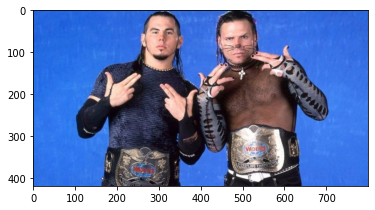

In [27]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고 

이번 익스는 굉장히 재밌었다 어려움은 없었지만 
2개이상의 얼굴에 모두 수염을 붙이고 싶었는데 
실력 부족으로 하지 못하였다 

재밌는 익스만 있으면 얼마나 좋을까 하하하하 